In [1]:

#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


In [2]:

# load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=colnames)
#iris = pd.read_csv(url)
data = iris


In [3]:

#select the features and target
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']



In [4]:
#scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
#split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
#define and fit the SVM model
svm = SVC()
svm.fit(Xtrain, ytrain)


SVC()

In [7]:
#make predictions
predictions = svm.predict(Xtest)


In [8]:
#evaluate the model
accuracy = metrics.accuracy_score(ytest, predictions)
print("The accuracy of the model is:", accuracy)


The accuracy of the model is: 1.0


In [9]:
#calculate different metrics
print(metrics.classification_report(ytest, predictions))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



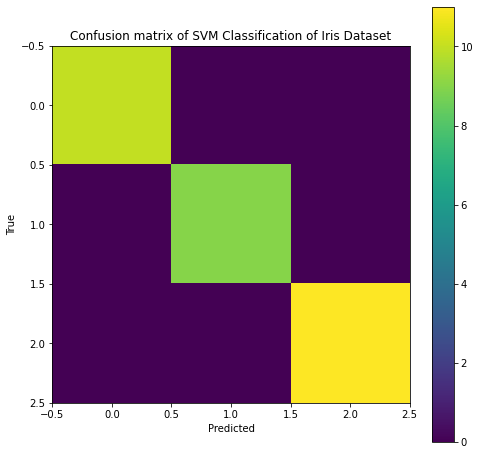

In [10]:
#visualize confusion matrix
cm = confusion_matrix(ytest, predictions)
plt.figure(figsize=(8,8))
plt.title('Confusion matrix of SVM Classification of Iris Dataset')
plt.imshow(cm)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [11]:
#use cross-validation to tune hyperparameters
clf = SVC(kernel='rbf', gamma='auto')
scores = cross_val_score(clf, X_scaled, y, cv=5)
print("Cross-Validation scores:", scores)


Cross-Validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]


In [12]:
#repeat the code to show the effect of the kernel
clf = SVC(kernel='linear', gamma='auto')
scores = cross_val_score(clf, X_scaled, y, cv=5)
print("Cross-Validation scores with linear kernel:", scores)

Cross-Validation scores with linear kernel: [0.96666667 1.         0.93333333 0.93333333 1.        ]
